# Important Necessities

In [1]:

import numpy as np 
import pandas as pd 



In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Checking the version of TensorFlow**

In [3]:
tf.__version__

'2.16.1'

# **Preprocessing the Training set**

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(r'D:\Brain tumor\brain_tumor_dataset',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 253 images belonging to 2 classes.


In [7]:
print(training_set.class_indices)

{'no': 0, 'yes': 1}


# **Building the CNN**

In [8]:
# Initialising the CNN
cnn = tf.keras.models.Sequential() 

# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) 

# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) 

#Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Training the CNN on the Training set
cnn.fit(x = training_set, epochs = 25)

C:\Users\rosin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


C:\Users\rosin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6325 - loss: 0.6708
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7266 - loss: 0.6047
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7615 - loss: 0.5322
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7295 - loss: 0.5380
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6620 - loss: 0.6026
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7218 - loss: 0.5289
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7497 - loss: 0.5015
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7998 - loss: 0.4679
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7315 - loss: 0.5607
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6977 - loss: 0.5916
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7474 - loss: 0.5129
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7733 - loss: 0.4535
Epoch 13/25


# **Making a single prediction**

In [10]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'D:\Brain tumor\brain_tumor_dataset\no\34 no.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [11]:
print(prediction)

No


# **Evaluating the Model using the Full Directory**

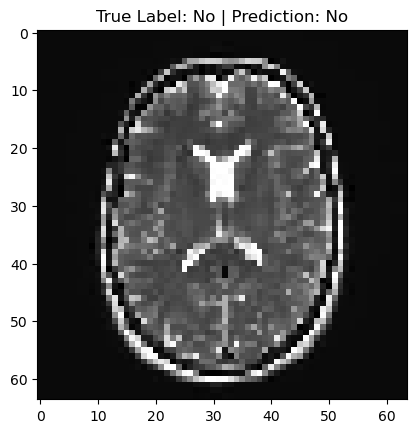

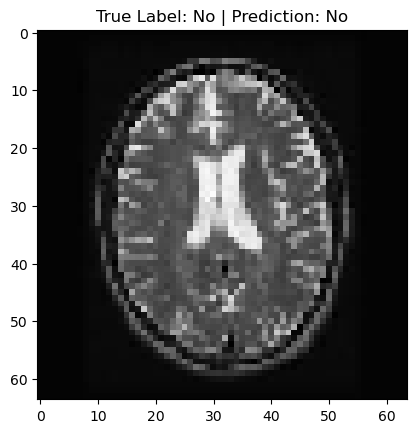

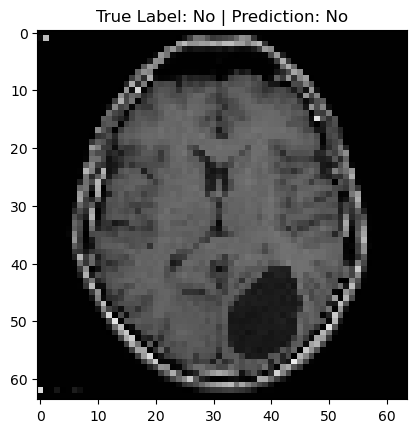

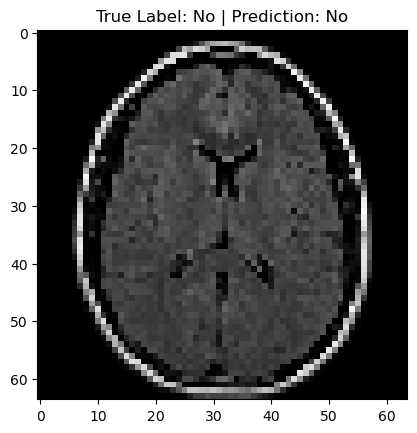

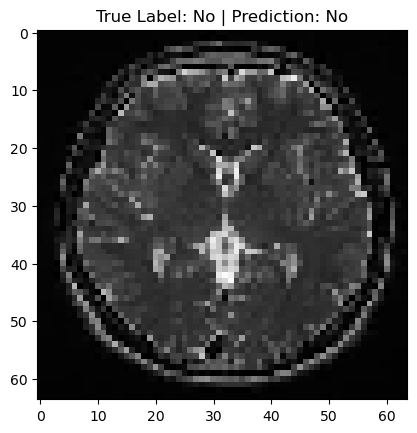

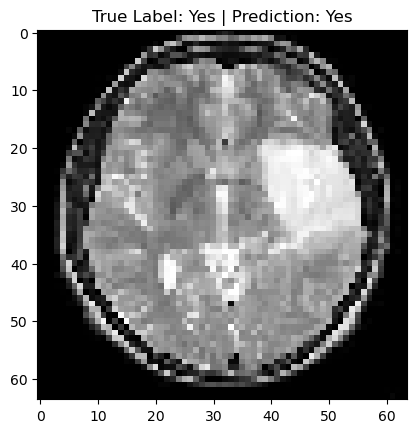

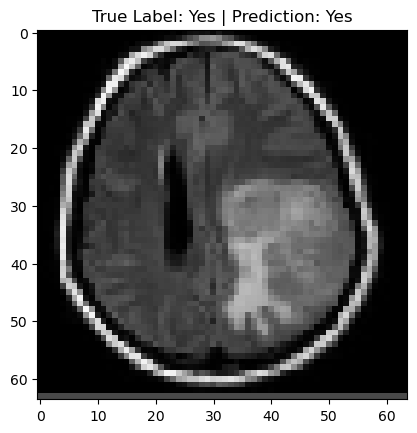

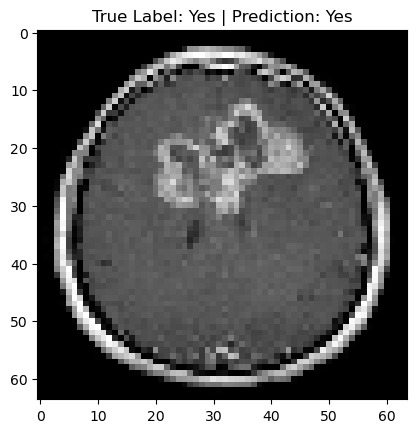

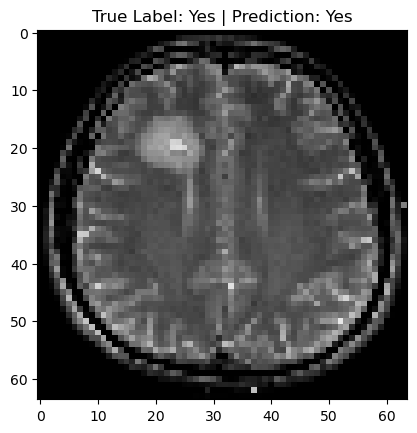

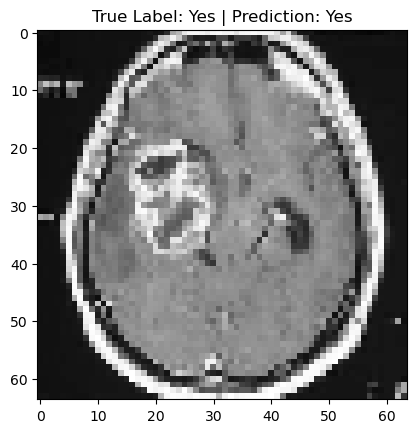

              precision    recall  f1-score   support

          No       0.89      0.89      0.89        98
         Yes       0.86      0.86      0.86        80

    accuracy                           0.88       178
   macro avg       0.88      0.88      0.88       178
weighted avg       0.88      0.88      0.88       178



In [16]:
import random
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Function to predict an image without visualization
def predict_image(model, file_path):
    img = image.load_img(file_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    result = model.predict(img_array, verbose=0)
    
    return 'Yes' if result[0][0] == 1 else 'No'

# Function to visualize predictions for a subset of images with true labels
def visualize_predictions_with_labels(model, no_dir, yes_dir):
    no_files = random.sample(os.listdir(no_dir), 5)
    yes_files = random.sample(os.listdir(yes_dir), 5)
    
    for file_name in no_files:
        file_path = os.path.join(no_dir, file_name)
        prediction = predict_image(model, file_path)
        
        img = image.load_img(file_path, target_size=(64, 64))
        plt.imshow(img)
        plt.title(f'True Label: No | Prediction: {prediction}')
        plt.show()
    
    for file_name in yes_files:
        file_path = os.path.join(yes_dir, file_name)
        prediction = predict_image(model, file_path)
        
        img = image.load_img(file_path, target_size=(64, 64))
        plt.imshow(img)
        plt.title(f'True Label: Yes | Prediction: {prediction}')
        plt.show()

# Function to generate classification report using all files
def generate_full_classification_report(model, no_dir, yes_dir):
    predictions = []
    true_labels = []
    
    for class_label, directory in [('No', no_dir), ('Yes', yes_dir)]:
        for file_name in os.listdir(directory):
            file_path = os.path.join(directory, file_name)
            prediction = predict_image(model, file_path)
            predictions.append(prediction)
            true_labels.append(class_label)
    
    print(classification_report(true_labels, predictions))

# Example usage:
no_dir = r'D:\Brain tumor\no'
yes_dir = r'D:\Brain tumor\yes'

# Visualize predictions for 10 random images (5 from each folder) with true labels
visualize_predictions_with_labels(cnn, no_dir, yes_dir)

# Generate classification report using all files from both folders
generate_full_classification_report(cnn, no_dir, yes_dir)
